<a href="https://colab.research.google.com/github/laurlouie/Education-Inequality/blob/main/DATA_3320_Education_Inequality_Data_Preparation_Lauren_Louie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


The purpose of this notebook is to produce a data set that is prepared for the analysis to answer the question of whether school performance can be predicted by socioeconomic factors.

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer


# About the data

This project utilizes two data sets. The primary data set is the EdGap data set from [EdGap.org](https://www.edgap.org/#5/37.875/-96.987). This data set from 2016 includes information about average ACT or SAT scores for schools and several socioeconomic characteristics of the school district. The secondary data set is basic information about each school from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp).


## EdGap data

All socioeconomic data (household income, unemployment, adult educational attainment, and family structure) are from the Census Bureau's American Community Survey.

EdGap.org report that ACT and SAT score data is from each state's department of education or some other public data release. The nature of the other public data release is not known.

The quality of the census data and the department of education data can be assumed to be reasonably high.

EdGap.org do not indicate that they processed the data in any way. The data were assembled by the EdGap.org team, so there is always the possibility for human error. Given the public nature of the data, we would be able to consult the original data sources to check the quality of the data if we had any questions.

## School Information data

The school information data is from the National Center for Education Statistics. This data set consists of basic identifying information about schools and can be assumed to be of reasonably high quality. As for the EdGap.org data, the school information data is public, so we would be able to consult the original data sources to check the quality of the data if we had any questions.

# Load the data

Load the EdGap data set

In [ ]:
edgap = pd.read_excel("https://github.com/laurlouie/Education-Inequality/raw/main/EdGap_data.xlsx")


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Load School Information data set

In [ ]:
!wget -O school_info.csv https://drive.usercontent.google.com/u/0/uc?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP&export=download


--2024-05-07 04:44:29--  https://drive.usercontent.google.com/u/0/uc?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.usercontent.google.com/uc?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP [following]
--2024-05-07 04:44:30--  https://drive.usercontent.google.com/uc?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP [following]
--2024-05-07 04:44:30--  https://drive.usercontent.google.com/download?id=1HvW2w-o2XZzCm4KTvnb1Bb3BvoAa14BP
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaitin

In [ ]:
school_info = pd.read_csv('school_info.csv', encoding= 'unicode_escape', dtype={'MZIP': 'str'})


<ipython-input-71-dc6eeef43c8f>:1: DtypeWarning: Columns (6,9,14,15,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_info = pd.read_csv('school_info.csv', encoding= 'unicode_escape', dtype={'MZIP': 'str'})


Load Census data (from additional step)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
census_data = "/content/drive/MyDrive/ACSST5Y2016.S1601-Data.csv"

census_df = pd.read_csv(census_data, low_memory=False)

# Explore the contents of the data sets

Exploring first 5 rows and general information for each of the three data sets

In [ ]:
edgap.head()


,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [ ]:
edgap.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


In [ ]:
school_info.head()


,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [ ]:
school_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

In [ ]:
census_df.head()


,GEO_ID,NAME,S1601_C01_001E,S1601_C01_001M,S1601_C02_001E,S1601_C02_001M,S1601_C03_001E,S1601_C03_001M,S1601_C04_001E,S1601_C04_001M,...,S1601_C02_024M,S1601_C03_024E,S1601_C03_024M,S1601_C04_024E,S1601_C04_024M,S1601_C05_024E,S1601_C05_024M,S1601_C06_024E,S1601_C06_024M,Unnamed: 290
0,Geography,Geographic Area Name,Total!!Estimate!!Population 5 years and over,Total!!Margin of Error!!Population 5 years and...,Percent!!Estimate!!Population 5 years and over,Percent!!Margin of Error!!Population 5 years a...,Percent of specified language speakers!!Speak ...,Percent of specified language speakers!!Speak ...,Percent of specified language speakers!!Percen...,Percent of specified language speakers!!Percen...,...,Percent!!Margin of Error!!CITIZENS 18 YEARS AN...,Percent of specified language speakers!!Speak ...,Percent of specified language speakers!!Speak ...,Percent of specified language speakers!!Percen...,Percent of specified language speakers!!Percen...,Percent of specified language speakers!!Speak ...,Percent of specified language speakers!!Speak ...,Percent of specified language speakers!!Percen...,Percent of specified language speakers!!Percen...,NaN
1,8600000US00601,ZCTA5 00601,16863,248,(X),(X),2303,418,13.7,2.5,...,0.3,0,21,-,**,0,21,-,**,NaN
2,8600000US00602,ZCTA5 00602,37810,170,(X),(X),9187,746,24.3,2.0,...,0.1,0,28,-,**,0,28,-,**,NaN
3,8600000US00603,ZCTA5 00603,49018,774,(X),(X),12687,939,25.9,1.9,...,0.2,64,72,71.1,38.2,26,31,28.9,38.2,NaN
4,8600000US00606,ZCTA5 00606,5991,222,(X),(X),445,137,7.4,2.4,...,0.8,0,19,-,**,0,19,-,**,NaN


In [ ]:
census_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Columns: 291 entries, GEO_ID to Unnamed: 290
dtypes: float64(1), object(290)
memory usage: 73.5+ MB


# Convert data types if necessary

The only table that looks strange is the school_info table.

In the NCESSCH variable, we want to drop the entries where there is a NaN value in the NCESSCH column as well as change the Dtype to an integer.

In [ ]:
school_info = school_info[school_info['NCESSCH'].isna() == False]

In [ ]:
school_info['NCESSCH'] = school_info['NCESSCH'].astype('int64')

<ipython-input-81-006ea9997674>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_info['NCESSCH'] = school_info['NCESSCH'].astype('int64')


# Are the data suitable for answering the question?

Performing a quick exploratory data analysis can help determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive. Since we are trying to find a relationship between the average ACT score and socioeconomic variable's impact, this will be helpful when we are trying to make visualizations down the line.

## Renaming columns

Renaming columns can help make the code readable for both author and audience members.

In [ ]:
edgap = edgap.rename(columns={"NCESSCH School ID":"id",
              "CT Pct Adults with College Degree":"percent_college",
              "CT Unemployment Rate":"rate_unemployment",
              "CT Pct Childre In Married Couple Family":"percent_married",
              "CT Median Household Income":"median_income",
              "School ACT average (or equivalent if SAT score)":"average_act",
              "School Pct Free and Reduced Lunch":"percent_lunch"})

In [ ]:
school_info = school_info.rename(columns={'SCHOOL_YEAR':'year',
                                          'NCESSCH':'id',
                                          'MSTATE':'state',
                                          'MZIP':'zip_code',
                                          'SCH_TYPE_TEXT':'school_type',
                                          'LEVEL':'school_level'})

## Explore relationships between the variables.



Using a pair plot can help determine any outstanding relationships between variables.

In [ ]:
edgap.columns


Index(['id', 'rate_unemployment', 'percent_college', 'percent_married',
       'median_income', 'average_act', 'percent_lunch'],
      dtype='object')

In [ ]:
# Removing any outliers with very low ACT scores.
edgap = edgap.loc[edgap["average_act"]>5]

<Figure size 1000x1000 with 0 Axes>

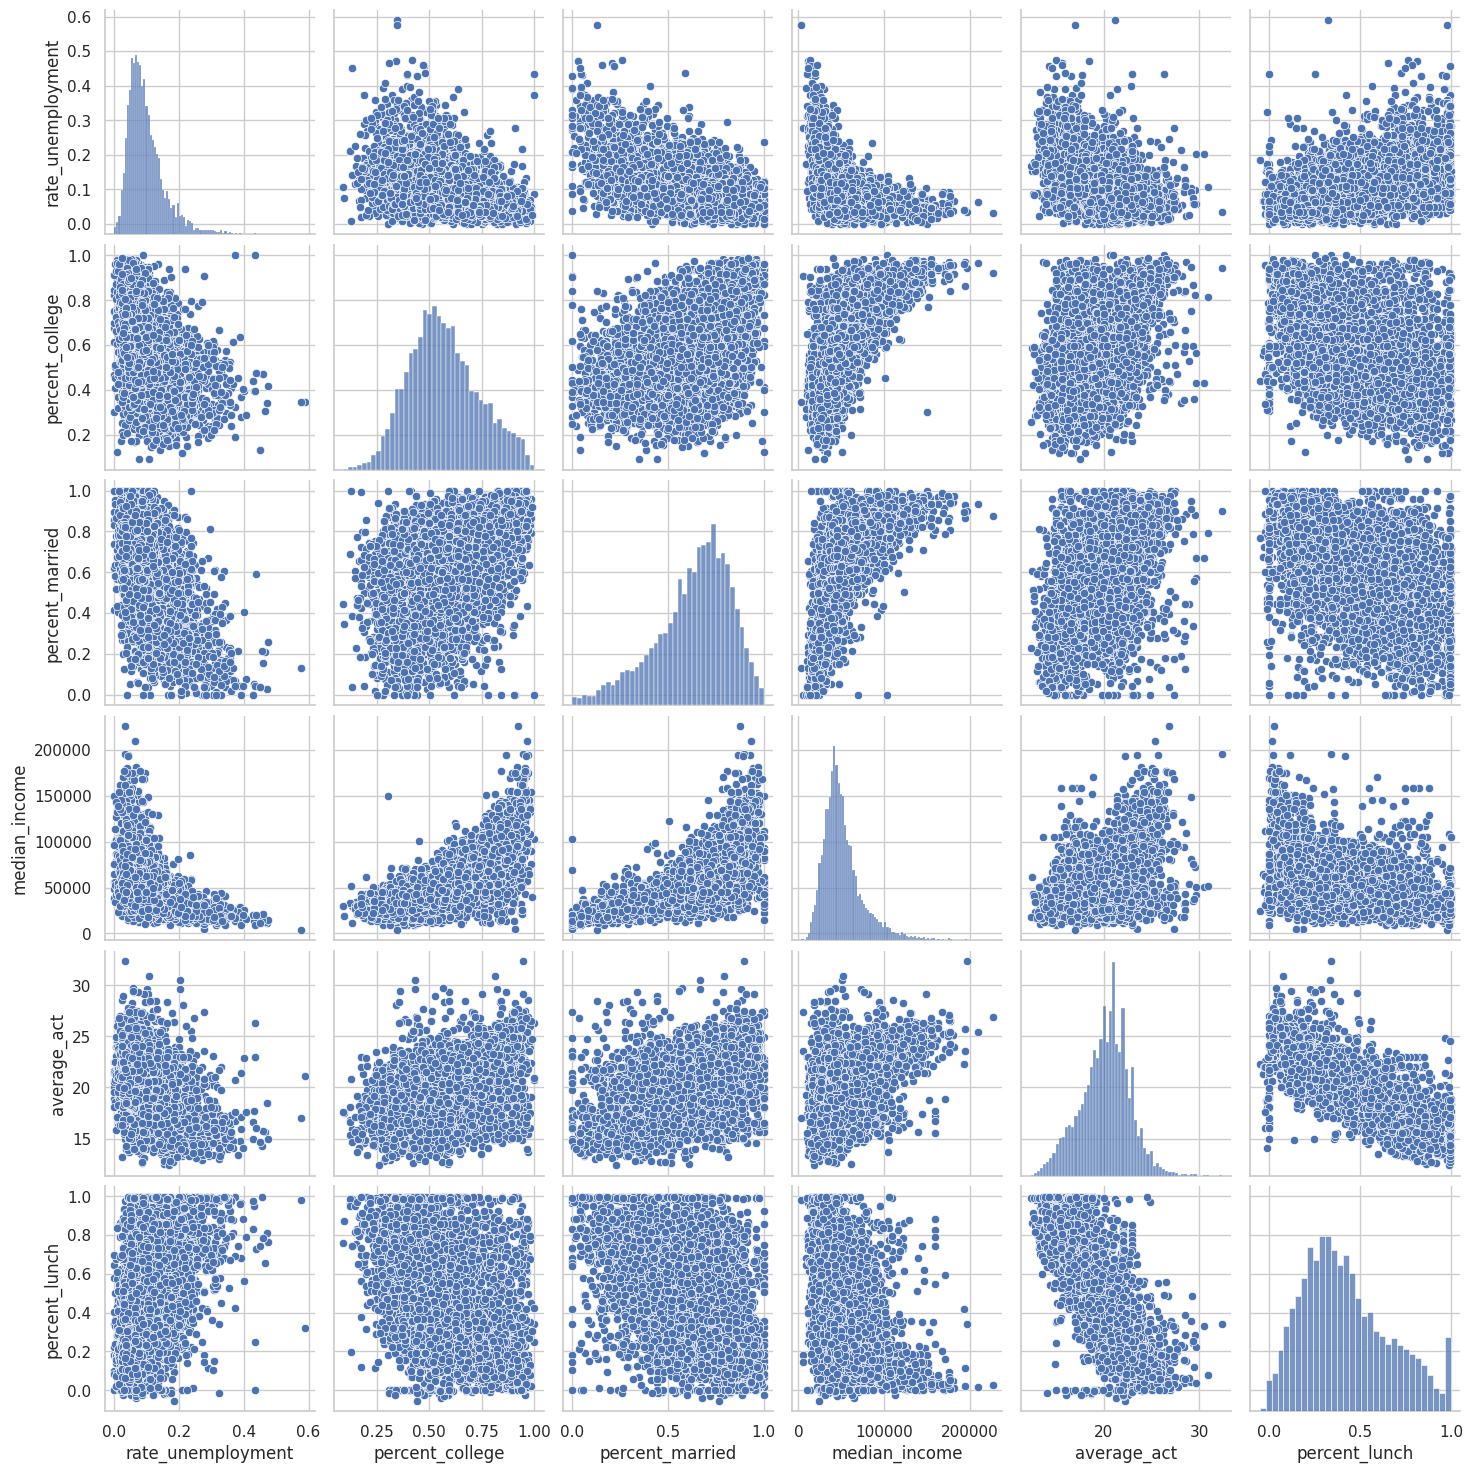

In [ ]:

fig = plt.figure()
sns.pairplot(edgap.drop(columns = 'id'))
fig.set_size_inches(10,10)

# Select relevant subsets of the data

The school information data set contains a lot of information. We only need the year, school identity, location, and school type information.

Keep the columns SCHOOL_YEAR, NCESSCH, MSTATE, MZIP, SCH_TYPE_TEXT, LEVEL

In [ ]:
school_info = school_info[['year',
                           'id',
                           'state',
                           'zip_code',
                           'school_type',
                           'school_level']]

In [ ]:
# Checking to make sure we kept the right variables.
school_info.head()

,year,id,state,zip_code,school_type,school_level
0,2016-2017,10000200277,AL,35220,Alternative School,High
1,2016-2017,10000201667,AL,36057,Alternative School,High
2,2016-2017,10000201670,AL,36057,Alternative School,High
3,2016-2017,10000201705,AL,36057,Alternative School,High
4,2016-2017,10000201706,AL,35206,Alternative School,High


# Join dataframes

Merging both EdGap and school_info datasets on the "id" column

In [ ]:
df = pd.DataFrame(edgap.merge(school_info, how = 'left', on='id'))

In [ ]:
df.head()


,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7983 non-null   int64  
 1   rate_unemployment  7969 non-null   float64
 2   percent_college    7970 non-null   float64
 3   percent_married    7958 non-null   float64
 4   median_income      7963 non-null   float64
 5   average_act        7983 non-null   float64
 6   percent_lunch      7983 non-null   float64
 7   year               7895 non-null   object 
 8   state              7895 non-null   object 
 9   zip_code           7895 non-null   object 
 10  school_type        7895 non-null   object 
 11  school_level       7895 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 748.5+ KB


In [ ]:
# Checking for any duplicate id's
len(df['id']) - len(df['id'].unique())

0

# Quality Control

Since we only need to find the data for the year 2016 and high school level, we can use the unique function to get the unique values from the list.

In [ ]:
df["year"].unique()

array(['2016-2017', nan], dtype=object)

In [ ]:
df["school_level"].unique()

array(['High', 'Other', 'Not reported', nan, 'Elementary'], dtype=object)

In [ ]:
df = df.drop(columns = 'year')
df = df.loc[df['school_level'] == 'High']

In [ ]:
print("Rate Unemployment <0:",
      sum(df["rate_unemployment"] < 0))
print("Rate Unemployment >1:",
      sum(df["rate_unemployment"] > 1))
print("Percent College <0:",
      sum(df["percent_college"] < 0))
print("Percent College >1:",
      sum(df["percent_college"] > 1))
print("Percent Married <0:",
      sum(df["percent_married"] < 0))
print("Percent Married >1:",
      sum(df["percent_married"] > 1))
print("Median Income <0:",
      sum(df["median_income"] < 0))
print("Average ACT <0:",
      sum(df["average_act"] < 0))
print("Average ACT >1:",
      sum(df["average_act"] > 36))
print("Percent Lunch <0:",
      sum(df["percent_lunch"] < 0))
print("Percent Lunch >1:",
      sum(df["percent_lunch"] > 1))

Rate Unemployment <0: 0
Rate Unemployment >1: 0
Percent College <0: 0
Percent College >1: 0
Percent Married <0: 0
Percent Married >1: 0
Median Income <0: 0
Average ACT <0: 0
Average ACT >1: 0
Percent Lunch <0: 20
Percent Lunch >1: 0


In [ ]:
# Based on the output above, the percent_lunch variable needs to be corrected.
df = df[df['percent_lunch'] > 0]

In [ ]:
# Dropping any duplicated dates
df = df.drop_duplicates()

# Additional Step

Below is the second part after completing the additional step proposal assignment.

In the additional step, the purpose of it is to discover how living in a multiligual area can affect one's ACT score. The data will be provided by the census to answer the question. The table S1601 by the Census provides data on languages spoken at home.

The Census datatable was already added in the beginning of this code and is titled census_df

In [ ]:
census_df

,GEO_ID,NAME,S1601_C01_001E,S1601_C01_001M,S1601_C02_001E,S1601_C02_001M,S1601_C03_001E,S1601_C03_001M,S1601_C04_001E,S1601_C04_001M,...,S1601_C02_024M,S1601_C03_024E,S1601_C03_024M,S1601_C04_024E,S1601_C04_024M,S1601_C05_024E,S1601_C05_024M,S1601_C06_024E,S1601_C06_024M,Unnamed: 290
0,Geography,Geographic Area Name,Total!!Estimate!!Population 5 years and over,Total!!Margin of Error!!Population 5 years and...,Percent!!Estimate!!Population 5 years and over,Percent!!Margin of Error!!Population 5 years a...,Percent of specified language speakers!!Speak ...,Percent of specified language speakers!!Speak ...,Percent of specified language speakers!!Percen...,Percent of specified language speakers!!Percen...,...,Percent!!Margin of Error!!CITIZENS 18 YEARS AN...,Percent of specified language speakers!!Speak ...,Percent of specified language speakers!!Speak ...,Percent of specified language speakers!!Percen...,Percent of specified language speakers!!Percen...,Percent of specified language speakers!!Speak ...,Percent of specified language speakers!!Speak ...,Percent of specified language speakers!!Percen...,Percent of specified language speakers!!Percen...,NaN
1,8600000US00601,ZCTA5 00601,16863,248,(X),(X),2303,418,13.7,2.5,...,0.3,0,21,-,**,0,21,-,**,NaN
2,8600000US00602,ZCTA5 00602,37810,170,(X),(X),9187,746,24.3,2.0,...,0.1,0,28,-,**,0,28,-,**,NaN
3,8600000US00603,ZCTA5 00603,49018,774,(X),(X),12687,939,25.9,1.9,...,0.2,64,72,71.1,38.2,26,31,28.9,38.2,NaN
4,8600000US00606,ZCTA5 00606,5991,222,(X),(X),445,137,7.4,2.4,...,0.8,0,19,-,**,0,19,-,**,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,8600000US99923,ZCTA5 99923,0,9,(X),(X),0,9,-,**,...,**,0,9,-,**,0,9,-,**,NaN
33117,8600000US99925,ZCTA5 99925,841,94,(X),(X),841,94,100.0,2.1,...,1.9,27,13,100.0,41.9,0,9,0.0,41.9,NaN
33118,8600000US99926,ZCTA5 99926,1519,103,(X),(X),1519,103,100.0,1.1,...,3.2,60,36,100.0,24.9,0,9,0.0,24.9,NaN
33119,8600000US99927,ZCTA5 99927,81,46,(X),(X),81,46,100.0,19.3,...,19.3,0,9,-,**,0,9,-,**,NaN


In [ ]:
# Row 0 should be the header of the data table
new_head = census_df.iloc[0]
census_df = census_df[1:]
census_df.columns = new_head

# Making the index start at 0 and not 1
census_df = census_df.reset_index(drop=True)

In [ ]:
census_df.head()


,Geography,Geographic Area Name,Total!!Estimate!!Population 5 years and over,Total!!Margin of Error!!Population 5 years and over,Percent!!Estimate!!Population 5 years and over,Percent!!Margin of Error!!Population 5 years and over,"Percent of specified language speakers!!Speak English only or speak English very well""!!Estimate!!Population 5 years and over""","Percent of specified language speakers!!Speak English only or speak English very well""!!Margin of Error!!Population 5 years and over""","Percent of specified language speakers!!Percent speak English only or speak English very well""!!Estimate!!Population 5 years and over""","Percent of specified language speakers!!Percent speak English only or speak English very well""!!Margin of Error!!Population 5 years and over""",...,Percent!!Margin of Error!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak a language other than English!!Other languages,"Percent of specified language speakers!!Speak English only or speak English very well""!!Estimate!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Percent of specified language speakers!!Speak English only or speak English very well""!!Margin of Error!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Percent of specified language speakers!!Percent speak English only or speak English very well""!!Estimate!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Percent of specified language speakers!!Percent speak English only or speak English very well""!!Margin of Error!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Percent of specified language speakers!!Speak English less than very well""!!Estimate!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Percent of specified language speakers!!Speak English less than very well""!!Margin of Error!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Percent of specified language speakers!!Percent speak English less than very well""!!Estimate!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Percent of specified language speakers!!Percent speak English less than very well""!!Margin of Error!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""",NaN
0,8600000US00601,ZCTA5 00601,16863,248,(X),(X),2303,418,13.7,2.5,...,0.3,0,21,-,**,0,21,-,**,NaN
1,8600000US00602,ZCTA5 00602,37810,170,(X),(X),9187,746,24.3,2.0,...,0.1,0,28,-,**,0,28,-,**,NaN
2,8600000US00603,ZCTA5 00603,49018,774,(X),(X),12687,939,25.9,1.9,...,0.2,64,72,71.1,38.2,26,31,28.9,38.2,NaN
3,8600000US00606,ZCTA5 00606,5991,222,(X),(X),445,137,7.4,2.4,...,0.8,0,19,-,**,0,19,-,**,NaN
4,8600000US00610,ZCTA5 00610,26631,197,(X),(X),4449,555,16.7,2.1,...,0.2,0,25,-,**,0,25,-,**,NaN


In [ ]:
# changing the Dtype to str
census_df["Geographic Area Name"] = census_df["Geographic Area Name"].astype(str)

In [ ]:
# Only keeping the variables relevant to the percent_multilingual variable
census_df = census_df[["Geographic Area Name", "Total!!Estimate!!Population 5 years and over", "Total!!Estimate!!Speak only English",
                       "Total!!Estimate!!Speak a language other than English",
                       'Percent of specified language speakers!!Speak English  less than very well"!!Estimate!!Population 5 years and over"']]

# Renaming columns to make the code readable
census_df = census_df.rename(columns={"Geographic Area Name":"zip_code",
              "Total!!Estimate!!Population 5 years and over":"population_over_five",
              "Total!!Estimate!!Speak only English":"only_english",
              "Total!!Estimate!!Speak a language other than English":"other_english",
              'Percent of specified language speakers!!Speak English  less than very well"!!Estimate!!Population 5 years and over"':"no_english"})

In [ ]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   zip_code              33120 non-null  object
 1   population_over_five  33120 non-null  object
 2   only_english          33120 non-null  object
 3   other_english         33120 non-null  object
 4   no_english            33120 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [ ]:
# Creating a list and for loop to remove the `ZCTA5` prefix area in the the zip codes to help with the merge
census_zip_codes = []

for i in census_df["zip_code"]:
  i = i.replace("ZCTA5 ","")
  census_zip_codes.append(i)
census_df["zip_code"] = census_zip_codes

In [ ]:
# Inner merge on zip codes
merged_df = pd.DataFrame(df.merge(census_df,
                                  how = 'inner',
                                  on='zip_code'))

In [ ]:
merged_df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,state,zip_code,school_type,school_level,population_over_five,only_english,other_english,no_english
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,DE,19804,Regular School,High,16498,14003,2495,1005
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,DE,19709,Regular School,High,36112,33041,3071,750
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,DE,19709,Regular School,High,36112,33041,3071,750
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,DE,19958,Regular School,High,22808,21247,1561,487
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,DE,19934,Regular School,High,13099,12022,1077,363


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7100 non-null   int64  
 1   rate_unemployment     7088 non-null   float64
 2   percent_college       7089 non-null   float64
 3   percent_married       7081 non-null   float64
 4   median_income         7084 non-null   float64
 5   average_act           7100 non-null   float64
 6   percent_lunch         7100 non-null   float64
 7   state                 7100 non-null   object 
 8   zip_code              7100 non-null   object 
 9   school_type           7100 non-null   object 
 10  school_level          7100 non-null   object 
 11  population_over_five  7100 non-null   object 
 12  only_english          7100 non-null   object 
 13  other_english         7100 non-null   object 
 14  no_english            7100 non-null   object 
dtypes: float64(6), int64(

In [ ]:
# Updating Dtypes in merged_df
merged_df["population_over_five"] = merged_df["population_over_five"].astype('int64')
merged_df["only_english"] = merged_df["only_english"].astype('int64')
merged_df["other_english"] = merged_df["other_english"].astype('int64')
merged_df["no_english"] = merged_df["no_english"].astype('int64')

In [ ]:
# Creating a list titled english to determine the population of those who speak English fluently (as their second language).
english_secondlanguage = []
for i in (merged_df["other_english"] - merged_df["no_english"]):
  english_secondlanguage.append(i)

merged_df["english_secondlanguage"] = english_secondlanguage

## Create relevant derived variable as new column

The percent_multilingual vairable is added into the dataframe as it is necesssary to answer the question.

In [ ]:
# Creating a list and a for loop to calculate the percentage of multilingual population amount and create a new column for the multilingual percentage
percent_multilingual = []

for i in (merged_df["english_secondlanguage"] / merged_df["population_over_five"]):
  percent_multilingual.append(i)

merged_df["percent_multilingual"] = percent_multilingual

In [ ]:
# Checking if percent_multilingual variable was added successfully
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7100 non-null   int64  
 1   rate_unemployment       7088 non-null   float64
 2   percent_college         7089 non-null   float64
 3   percent_married         7081 non-null   float64
 4   median_income           7084 non-null   float64
 5   average_act             7100 non-null   float64
 6   percent_lunch           7100 non-null   float64
 7   state                   7100 non-null   object 
 8   zip_code                7100 non-null   object 
 9   school_type             7100 non-null   object 
 10  school_level            7100 non-null   object 
 11  population_over_five    7100 non-null   int64  
 12  only_english            7100 non-null   int64  
 13  other_english           7100 non-null   int64  
 14  no_english              7100 non-null   

In [ ]:
# Keeping the necessary columns for analysis
final_features = ["id",
                  "rate_unemployment",
                  "percent_college",
                  "percent_married",
                  "median_income",
                  "average_act",
                  "percent_lunch",
                  "percent_multilingual",
                  "english_secondlanguage",
                  "state",
                  "zip_code",
                  "school_type",
                  "school_level"]
new_df = merged_df[final_features]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7100 non-null   int64  
 1   rate_unemployment       7088 non-null   float64
 2   percent_college         7089 non-null   float64
 3   percent_married         7081 non-null   float64
 4   median_income           7084 non-null   float64
 5   average_act             7100 non-null   float64
 6   percent_lunch           7100 non-null   float64
 7   percent_multilingual    7098 non-null   float64
 8   english_secondlanguage  7100 non-null   int64  
 9   state                   7100 non-null   object 
 10  zip_code                7100 non-null   object 
 11  school_type             7100 non-null   object 
 12  school_level            7100 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 721.2+ KB


# Identify missing values

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7100 non-null   int64  
 1   rate_unemployment       7088 non-null   float64
 2   percent_college         7089 non-null   float64
 3   percent_married         7081 non-null   float64
 4   median_income           7084 non-null   float64
 5   average_act             7100 non-null   float64
 6   percent_lunch           7100 non-null   float64
 7   percent_multilingual    7098 non-null   float64
 8   english_secondlanguage  7100 non-null   int64  
 9   state                   7100 non-null   object 
 10  zip_code                7100 non-null   object 
 11  school_type             7100 non-null   object 
 12  school_level            7100 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 721.2+ KB


In [ ]:
missing = new_df.isna().sum()
missing.sum()

60

<Axes: >

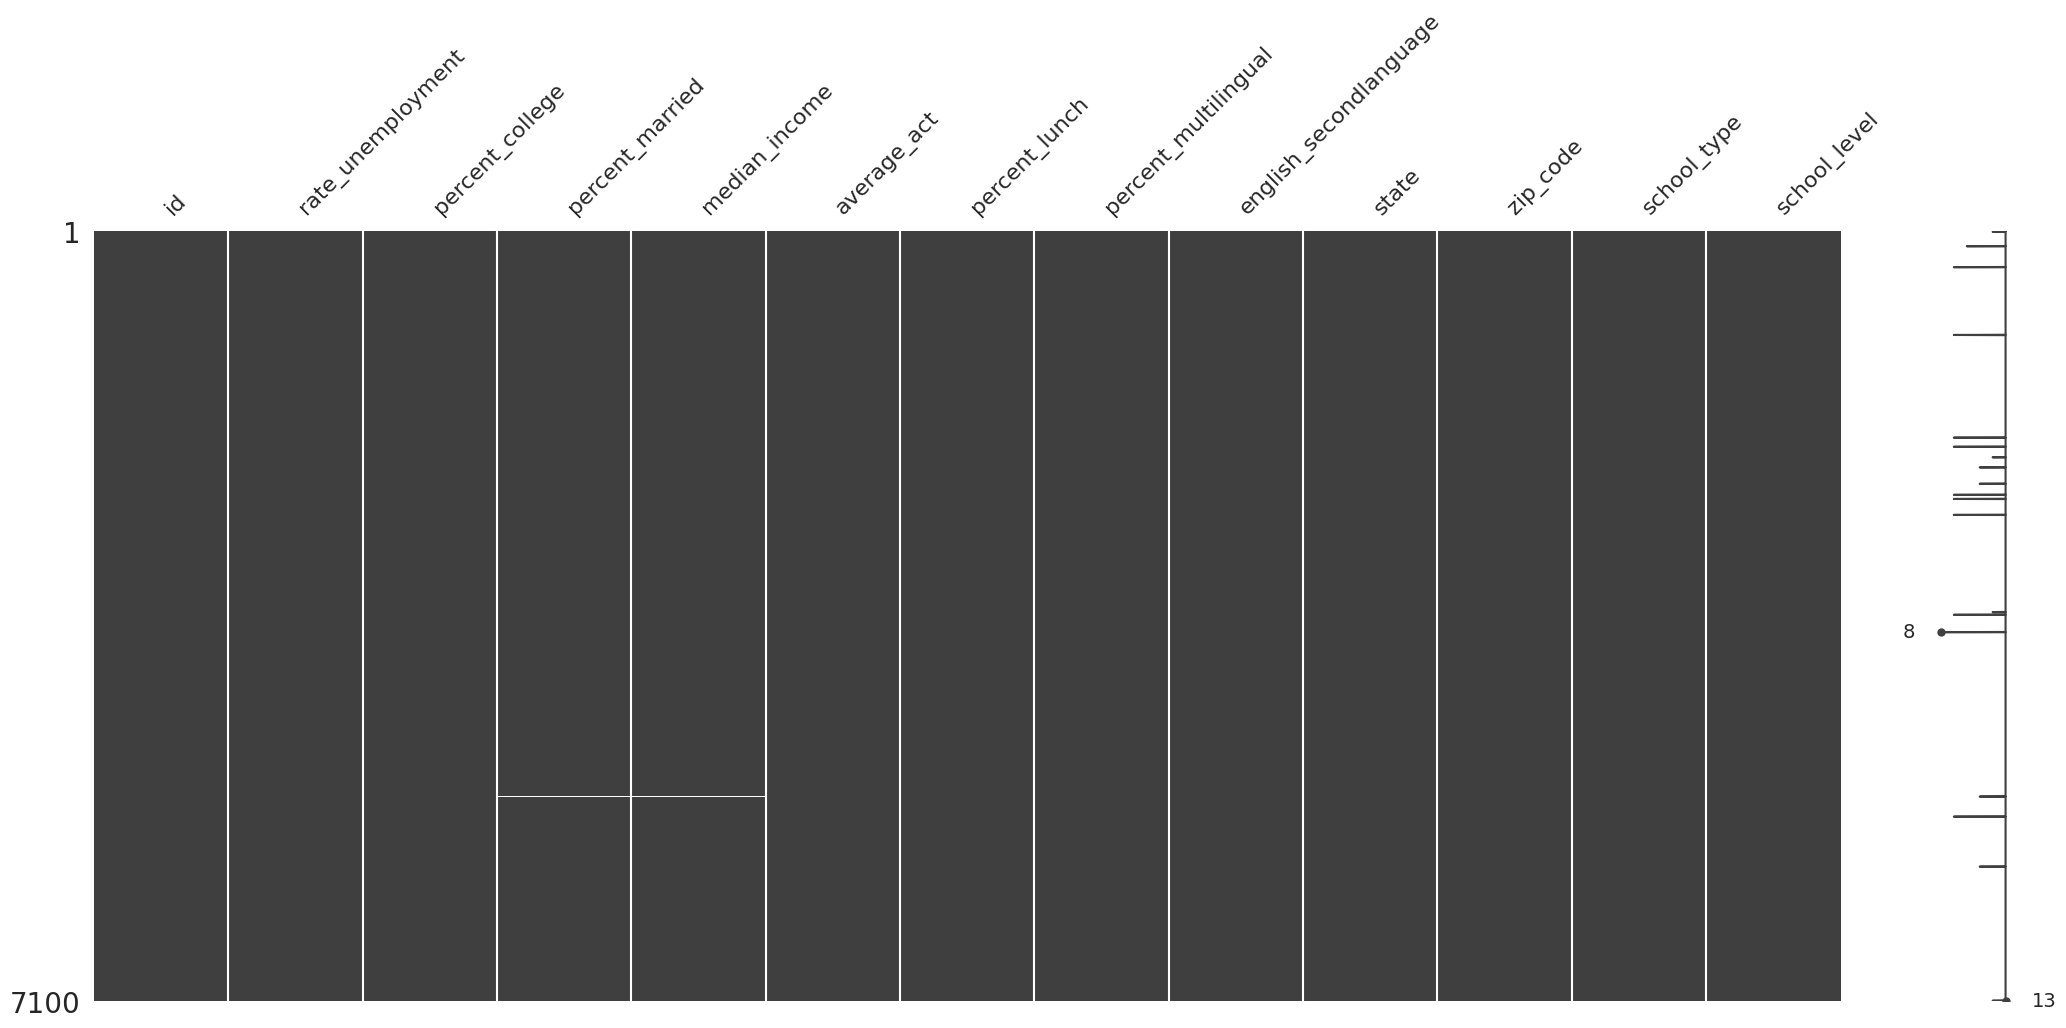

In [ ]:
msno.matrix(new_df)

# Train test split

We will use the test set approach to compare models predicting `average_act`.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/ML_dataset_training_validation_test_sets.png/800px-ML_dataset_training_validation_test_sets.png)

Split the data into training and testing sets. Keep 20% of the data for the test set.

In [ ]:
features = ["id",
            "rate_unemployment",
            "percent_college",
            "percent_married",
            "median_income",
            "percent_lunch",
            "percent_multilingual",
            "english_secondlanguage",
            "state",
            "zip_code",
            "school_type",
            "school_level"]

target = ["average_act"]

X = new_df[features]
Y = new_df[target]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=71)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5680, 12)
(1420, 12)
(5680, 1)
(1420, 1)


# Normalization

In [ ]:
X_train_ids = X_train["id"]
X_test_ids = X_test["id"]

X_train = X_train.drop(columns = "id")
X_test = X_test.drop(columns = "id")

In [ ]:
# Creating two new dataframes for mean and standard deviation
average = X_train.select_dtypes(include = "number").mean()
mean_df = pd.DataFrame(X_train.select_dtypes(include = "number").mean())

std = X_train.select_dtypes(include = "number").std()
standev_df = pd.DataFrame(X_train.select_dtypes(include = "number").std())

X_train_normalized = (X_train - average)/std
X_test_normalized = (X_test - average)/std

In [ ]:
X_train_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5680 entries, 3601 to 4013
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   english_secondlanguage  5680 non-null   float64
 1   median_income           5665 non-null   float64
 2   percent_college         5670 non-null   float64
 3   percent_lunch           5680 non-null   float64
 4   percent_married         5662 non-null   float64
 5   percent_multilingual    5678 non-null   float64
 6   rate_unemployment       5669 non-null   float64
 7   school_level            0 non-null      object 
 8   school_type             0 non-null      object 
 9   state                   0 non-null      object 
 10  zip_code                0 non-null      object 
dtypes: float64(7), object(4)
memory usage: 532.5+ KB


In [ ]:
X_test_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1420 entries, 4563 to 6244
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   english_secondlanguage  1420 non-null   float64
 1   median_income           1419 non-null   float64
 2   percent_college         1419 non-null   float64
 3   percent_lunch           1420 non-null   float64
 4   percent_married         1419 non-null   float64
 5   percent_multilingual    1420 non-null   float64
 6   rate_unemployment       1419 non-null   float64
 7   school_level            0 non-null      object 
 8   school_type             0 non-null      object 
 9   state                   0 non-null      object 
 10  zip_code                0 non-null      object 
dtypes: float64(7), object(4)
memory usage: 133.1+ KB


# Imputation

Use an imputation method to replace missing values in the columns corresponding to predictor variables in the analysis.

Ensuring that missing values in the specified numerical variables are imputed using an iterative imputation technique, allowing the datasets to be ready for further analysis or modeling.

In [ ]:
numb_variables = ["rate_unemployment",
            "percent_college",
            "percent_married",
            "median_income",
            "percent_lunch",
            "percent_multilingual",
            "english_secondlanguage"]

# Initializing Imputer
imp = IterativeImputer(random_state=0)

# Fit and Transform train and test data
X_train_normalized[numb_variables] = imp.fit_transform(X_train_normalized[numb_variables])
X_test_normalized[numb_variables] = imp.transform(X_test_normalized[numb_variables])

In [ ]:
X_train.insert(loc=0, column="id", value=X_train_ids)
X_train["rate_unemployment"] = X_train_normalized["rate_unemployment"]
X_train["percent_college"] = X_train_normalized["percent_college"]
X_train["percent_married"] = X_train_normalized["percent_married"]
X_train["median_income"] = X_train_normalized["median_income"]
X_train["percent_lunch"] = X_train_normalized["percent_lunch"]

X_test.insert(loc=0, column="id", value=X_test_ids)
X_test["rate_unemployment"] = X_test_normalized["rate_unemployment"]
X_test["percent_college"] = X_test_normalized["percent_college"]
X_test["percent_married"] = X_test_normalized["percent_married"]
X_test["median_income"] = X_test_normalized["median_income"]
X_test["percent_lunch"] = X_test_normalized["percent_lunch"]

In [ ]:
X_train["average_act"] = Y_train
X_test["average_act"] = Y_test

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5680 entries, 3601 to 4013
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5680 non-null   int64  
 1   rate_unemployment       5680 non-null   float64
 2   percent_college         5680 non-null   float64
 3   percent_married         5680 non-null   float64
 4   median_income           5680 non-null   float64
 5   percent_lunch           5680 non-null   float64
 6   percent_multilingual    5678 non-null   float64
 7   english_secondlanguage  5680 non-null   int64  
 8   state                   5680 non-null   object 
 9   zip_code                5680 non-null   object 
 10  school_type             5680 non-null   object 
 11  school_level            5680 non-null   object 
 12  average_act             5680 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 621.2+ KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1420 entries, 4563 to 6244
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1420 non-null   int64  
 1   rate_unemployment       1420 non-null   float64
 2   percent_college         1420 non-null   float64
 3   percent_married         1420 non-null   float64
 4   median_income           1420 non-null   float64
 5   percent_lunch           1420 non-null   float64
 6   percent_multilingual    1420 non-null   float64
 7   english_secondlanguage  1420 non-null   int64  
 8   state                   1420 non-null   object 
 9   zip_code                1420 non-null   object 
 10  school_type             1420 non-null   object 
 11  school_level            1420 non-null   object 
 12  average_act             1420 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 155.3+ KB


Need to merge the two datasets of X_train and X_test to create the df called clean_df for analyzing purposes.

In [122]:
new_df = pd.concat([X_train, X_test], axis=0)

# Reset index of the merged dataframe
new_df.reset_index(drop=True, inplace=True)

# Verify the shape of the merged dataframe
print("Shape of merged dataframe:", new_df.shape)

Shape of merged dataframe: (7100, 13)


In [124]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7100 non-null   int64  
 1   rate_unemployment       7100 non-null   float64
 2   percent_college         7100 non-null   float64
 3   percent_married         7100 non-null   float64
 4   median_income           7100 non-null   float64
 5   percent_lunch           7100 non-null   float64
 6   percent_multilingual    7098 non-null   float64
 7   english_secondlanguage  7100 non-null   int64  
 8   state                   7100 non-null   object 
 9   zip_code                7100 non-null   object 
 10  school_type             7100 non-null   object 
 11  school_level            7100 non-null   object 
 12  average_act             7100 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 721.2+ KB


## Export the clean .csv files

In [ ]:
X_train.to_csv("clean_X_train.csv", index=False)

In [ ]:
X_test.to_csv("clean_X_test.csv", index=False)

In [ ]:
mean_df.to_csv("mean_df.csv", index=False)

In [ ]:
standev_df.to_csv("standev_df.csv", index=False)

In [ ]:
Y_train.to_csv("clean_Y_train.csv", index=False)

In [ ]:
Y_test.to_csv("clean_Y_test.csv", index=False)

In [125]:
new_df.to_csv("clean_df.csv", index=False)